# Checkpoint 4: Simple Monte Carlo Generation of Pseudo Experiments


## Preamble

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time

## Simulating 1000 muon decays

time to complete (s): 0.004254600000000108
estimated lifetime: 2.2


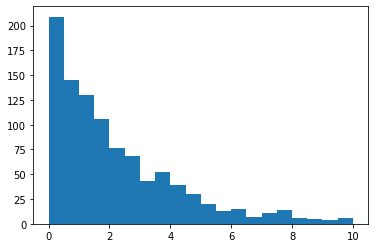

In [2]:
# using the inverse cumulative method over the range 0-10

def inverse_cum(high, tau):

    def cum_func(t):
        return 1 - np.exp(-t / tau)
    def inverse(y):
        return - tau * np.log(1 - y)

    # generate a random number in the range [g(a), g(b)]
    y = np.random.uniform()*cum_func(high)
    return inverse(y)
start = time.perf_counter()
randoms = [inverse_cum(10, 2.2) for _ in range(1000)]
print("time to complete (s):", time.perf_counter() - start)
plt.hist(randoms, bins=20)
print("estimated lifetime:", round(np.mean(randoms),2))

time to complete (s): 0.0004117999999999622
estimated lifetime: 2.06


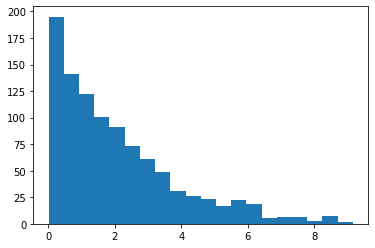

In [3]:
# using the number exponential generator 

tau = 2.2
generator = np.random.default_rng()
start = time.perf_counter()
randoms = generator.exponential(tau, 1000)
# set the distribution in the range 0->10
while np.any(randoms > 10):
    randoms[randoms > 10] = generator.exponential(tau)
print("time to complete (s):", time.perf_counter() - start)
plt.hist(randoms, bins=20)
print("estimated lifetime:", round(np.mean(randoms),2))

Both methods produce estimates lower than the actual value of 2.2 due to the limited range over which the results are generated. In fact, removing the code to clamp the numpy distribution produces an estimate of the lifetime much closer to 2.2. It is not possible to generate values up to infinity to the result will always be less than the actual value

## Repeat 500 times

τ = 2.11 +/- 0.06
variance: 0.0038
bias: -0.09


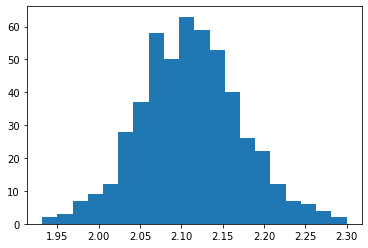

In [4]:
# using the numpy method for the performance boost
randoms = generator.exponential(tau, (500, 1000))
# once again setting the range of the distribution
while np.any(randoms > 10):
    randoms[randoms > 10] = generator.exponential(tau)
t_est = np.mean(randoms,axis=1)
plt.hist(t_est, bins=20)
# calculate the mean, std, and variance
mean = np.mean(t_est)
std = np.std(t_est)
var = np.var(t_est)
bias = sum(t_est - tau) / len(t_est)
print(f"\u03C4 = {round(mean, 2)} +/- {round(std, 2)}")
print("variance:", round(var, 4))
print("bias:", round(bias, 2))